<a href="https://colab.research.google.com/github/Navaneeth-ram/Readmission-of-patient-using-Logistic-Regression/blob/main/Readmission_of_a_patient_in_hospital_Prediction_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Getting the dataset

mydata=pd.read_csv("/content/Health_Data.csv")
df=mydata.iloc[:,:]
y=df.iloc[:,-1]
X=df.iloc[:,:- 1]
X.head()



,Patient_id,Age,Admission_type,PreExistingDisease,PreviousSurgery,Gender,Smoker,Homeless,DaysinHospital
0,1,33,Urgent,Y,0,M,1,0,1
1,2,34,Emergency,N,0,M,1,0,22
2,3,88,Trauma,Y,1,M,1,1,100
3,4,56,Elective,Y,0,M,1,0,2
4,5,45,Trauma,Y,0,M,1,0,34


In [19]:
Adm_type=pd.get_dummies(X.iloc[:,2],drop_first=True)
Pre_disease = pd.get_dummies(X.iloc[:,3],drop_first = True)
gen=pd.get_dummies(X.iloc[:,5],drop_first=True)

In [20]:
X.head()

,Patient_id,Age,Admission_type,PreExistingDisease,PreviousSurgery,Gender,Smoker,Homeless,DaysinHospital
0,1,33,Urgent,Y,0,M,1,0,1
1,2,34,Emergency,N,0,M,1,0,22
2,3,88,Trauma,Y,1,M,1,1,100
3,4,56,Elective,Y,0,M,1,0,2
4,5,45,Trauma,Y,0,M,1,0,34


In [21]:
X = X.drop(['Admission_type','PreExistingDisease','Gender','Patient_id'],axis=1)

In [22]:
X.head()

,Age,PreviousSurgery,Smoker,Homeless,DaysinHospital
0,33,0,1,0,1
1,34,0,1,0,22
2,88,1,1,1,100
3,56,0,1,0,2
4,45,0,1,0,34


In [23]:
X=pd.concat([X,Adm_type,Pre_disease,gen],axis=1)
X.head()

,Age,PreviousSurgery,Smoker,Homeless,DaysinHospital,Emergency,Newborn,Trauma,Urgent,Y,M
0,33,0,1,0,1,0,0,0,1,1,1
1,34,0,1,0,22,1,0,0,0,0,1
2,88,1,1,1,100,0,0,1,0,1,1
3,56,0,1,0,2,0,0,0,0,1,1
4,45,0,1,0,34,0,0,1,0,1,1


In [24]:
#Basic Data Preprocessing

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)

# Scaling of Data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X_test.columns)

X_test=sc.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X_train.columns)

In [25]:
X_train.head()

,Age,PreviousSurgery,Smoker,Homeless,DaysinHospital,Emergency,Newborn,Trauma,Urgent,Y,M
0,0.669196,-0.669690,0.848189,1.241996,-0.011330,-0.334108,-0.310371,1.850926,-0.770281,-0.682831,-0.971128
1,-1.084286,1.493228,-1.178983,1.241996,-0.856314,-0.334108,-0.310371,-0.540270,1.298227,1.464492,1.029730
2,-0.713357,1.493228,0.848189,1.241996,-0.817906,-0.334108,-0.310371,-0.540270,1.298227,-0.682831,1.029730
3,1.579657,-0.669690,0.848189,-0.805156,-0.741089,-0.334108,-0.310371,-0.540270,-0.770281,-0.682831,-0.971128
4,-1.488935,-0.669690,-1.178983,-0.805156,-0.741089,-0.334108,3.221949,-0.540270,-0.770281,-0.682831,-0.971128


In [26]:
y_train.head()

104    0
336    0
118    0
31     0
36     0
Name: Readmitted, dtype: int64

In [27]:
#Importing model and performance metrics libraries

from sklearn.linear_model import LogisticRegression

#Fitting the model to X_train and y_train
model= LogisticRegression()
model.fit(X_train,y_train)

#Doing prediction on X_test

y_pred= model.predict(X_test)

In [28]:
#Calculating Null Accuracy
null_accuracy=y.value_counts().head(1)/len(y)
null_accuracy

0    0.806723
Name: Readmitted, dtype: float64

In [29]:
#Calculating Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9067796610169492

In [30]:
#Importing confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[97,  0],
       [11, 10]])

In [31]:
True_Negative = cm[0,0]
True_Negative

97

In [32]:
True_positive= cm[1,1]
True_positive

10

In [33]:
False_positive= cm[0,1]
False_positive

0

In [34]:
False_negative=cm[1,0]
False_negative

11

In [35]:
## Calculating Sensitivity
Sensitivity=True_positive/(True_positive+False_negative)
Sensitivity

0.47619047619047616

In [36]:
##Calculating Specificity
Specificity=True_Negative/(True_Negative+False_positive)
Specificity

1.0

In [37]:
#Calculating precision
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

1.0

In [38]:
#Calculating FPR
False_Positive_rate= False_positive/(False_positive+True_Negative)
False_Positive_rate

0.0

In [39]:
#Calculating F1 score
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.6451612903225806

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        97
           1       1.00      0.48      0.65        21

    accuracy                           0.91       118
   macro avg       0.95      0.74      0.80       118
weighted avg       0.92      0.91      0.89       118



In [41]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1]


In [42]:
y_pred_prob= model.predict_proba(X_test)

In [43]:
y_pred_prob[:20]

array([[0.98508013, 0.01491987],
       [0.99029424, 0.00970576],
       [0.89983347, 0.10016653],
       [0.97976369, 0.02023631],
       [0.99019424, 0.00980576],
       [0.73435512, 0.26564488],
       [0.90465194, 0.09534806],
       [0.98922886, 0.01077114],
       [0.97003692, 0.02996308],
       [0.93212181, 0.06787819],
       [0.96153879, 0.03846121],
       [0.97836961, 0.02163039],
       [0.40686011, 0.59313989],
       [0.69851645, 0.30148355],
       [0.96747344, 0.03252656],
       [0.90681027, 0.09318973],
       [0.96824583, 0.03175417],
       [0.9903426 , 0.0096574 ],
       [0.94779553, 0.05220447],
       [0.89990172, 0.10009828]])

In [44]:
y_pred_prob=model.predict_proba(X_test)[:,1]
y_pred_prob[:20]

array([0.01491987, 0.00970576, 0.10016653, 0.02023631, 0.00980576,
       0.26564488, 0.09534806, 0.01077114, 0.02996308, 0.06787819,
       0.03846121, 0.02163039, 0.59313989, 0.30148355, 0.03252656,
       0.09318973, 0.03175417, 0.0096574 , 0.05220447, 0.10009828])

In [45]:
from sklearn.metrics import  roc_auc_score ,roc_curve
roc_curve(y_test,y_pred_prob)

(array([0.        , 0.        , 0.        , 0.03092784, 0.03092784,
        0.04123711, 0.04123711, 0.1443299 , 0.1443299 , 0.15463918,
        0.15463918, 0.16494845, 0.16494845, 0.25773196, 0.25773196,
        0.34020619, 0.34020619, 0.37113402, 0.39175258, 0.48453608,
        0.48453608, 0.49484536, 0.49484536, 0.77319588, 0.77319588,
        1.        ]),
 array([0.        , 0.04761905, 0.52380952, 0.52380952, 0.57142857,
        0.57142857, 0.61904762, 0.61904762, 0.66666667, 0.66666667,
        0.71428571, 0.71428571, 0.76190476, 0.76190476, 0.80952381,
        0.80952381, 0.85714286, 0.85714286, 0.85714286, 0.85714286,
        0.9047619 , 0.9047619 , 0.95238095, 0.95238095, 1.        ,
        1.        ]),
 array([1.81528235, 0.81528235, 0.40891773, 0.30148355, 0.28239841,
        0.27730094, 0.27192505, 0.15651529, 0.14563094, 0.14469868,
        0.14411075, 0.14276499, 0.14061025, 0.11003774, 0.10712099,
        0.0912902 , 0.08834144, 0.08476115, 0.08013767, 0.05906255,
    

In [46]:
fpr,tpr,thresholds= roc_curve(y_test,y_pred_prob)

In [47]:
fpr

array([0.        , 0.        , 0.        , 0.03092784, 0.03092784,
       0.04123711, 0.04123711, 0.1443299 , 0.1443299 , 0.15463918,
       0.15463918, 0.16494845, 0.16494845, 0.25773196, 0.25773196,
       0.34020619, 0.34020619, 0.37113402, 0.39175258, 0.48453608,
       0.48453608, 0.49484536, 0.49484536, 0.77319588, 0.77319588,
       1.        ])

In [48]:
tpr

array([0.        , 0.04761905, 0.52380952, 0.52380952, 0.57142857,
       0.57142857, 0.61904762, 0.61904762, 0.66666667, 0.66666667,
       0.71428571, 0.71428571, 0.76190476, 0.76190476, 0.80952381,
       0.80952381, 0.85714286, 0.85714286, 0.85714286, 0.85714286,
       0.9047619 , 0.9047619 , 0.95238095, 0.95238095, 1.        ,
       1.        ])

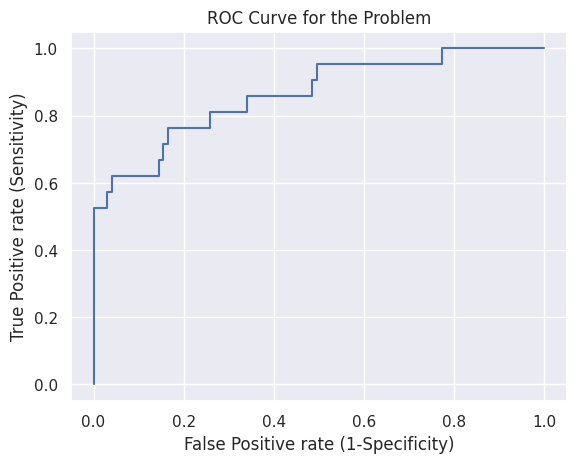

In [49]:
plt.plot(fpr,tpr)
plt.title("ROC Curve for the Problem")
plt.xlabel("False Positive rate (1-Specificity)")
plt.ylabel("True Positive rate (Sensitivity)")
plt.grid(True)
plt.show()

In [51]:
roc_auc_score(y_test,y_pred_prob)

0.8625429553264604